# Spring 2023 ME395: Deep Learning Discrete Calculus (DLDC) for Engineering Applications
# Lecture 4.1 Regression and optimization

Instructors: \
> Prof. Wing Kam Liu, w-liu@northwestern.edu \

Guest lecturers: \
> Prof.Mark Fleming \
> Dr. Abdullah Al Amin \

> 
Graders: \
> Sourav Saha \
> Jiachen Guo \
> Chanwook Park, chanwookpark2024@u.northwestern.edu \

Pytorch

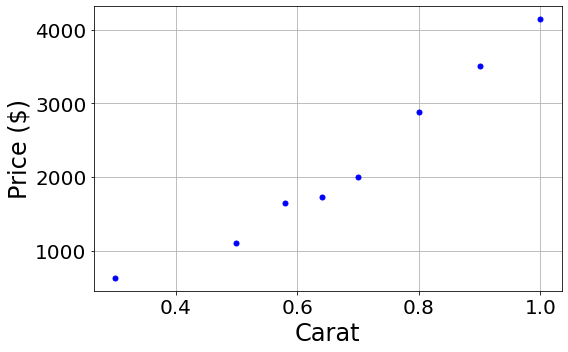

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

# Get x y values of the sine wave
x_data = np.array([0.3,0.5,0.58,0.64,0.7,0.8,0.9,1.0])
y_data = np.array([630,1098,1641,1733,2000,2885,3508,4140])

# plot x, y
fig, ax = plt.subplots(figsize = (8,5))
line, = ax.plot(x_data, y_data, 'o', markersize=5, color='blue', label='Original function')    
# ax.legend(shadow=True, borderpad=1, fontsize=20, loc='best')
ax.axes.tick_params(labelsize=20)
ax.set_xlabel("Carat", fontsize=24)
ax.set_ylabel("Price ($)", fontsize=24)
ax.grid()
fig.tight_layout()

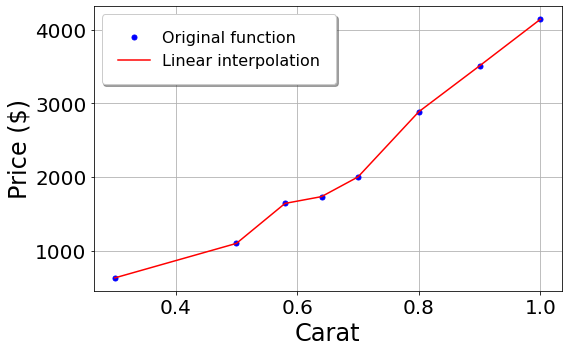

In [ ]:
# Interpolation (piecewise linear)
# plot x, y
fig, ax = plt.subplots(figsize = (8,5))
line, = ax.plot(x_data, y_data, 'o', markersize=5, color='blue', label='Original function')    
line, = ax.plot(x_data, y_data, '-', markersize=5, color='red', label='Linear interpolation')    
ax.legend(shadow=True, borderpad=1, fontsize=16, loc='best')
ax.axes.tick_params(labelsize=20)
ax.set_xlabel("Carat", fontsize=24)
ax.set_ylabel("Price ($)", fontsize=24)
ax.grid()
fig.tight_layout()

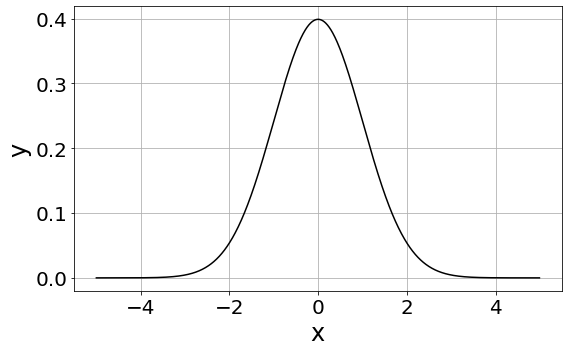

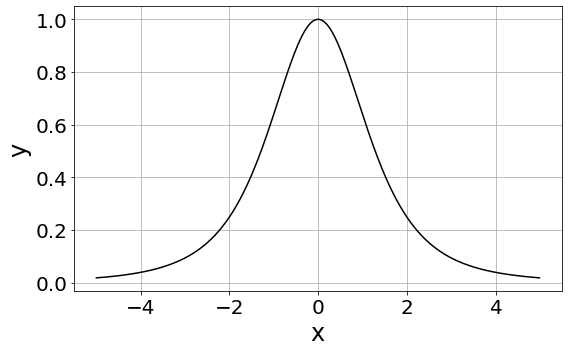

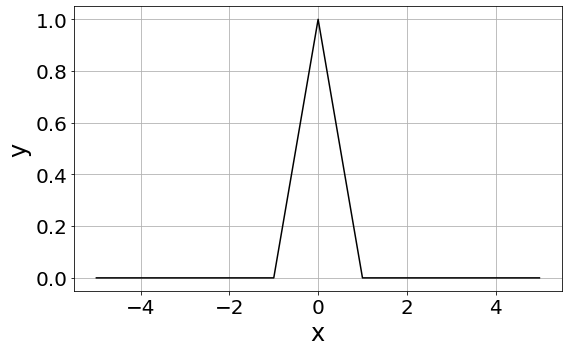

In [ ]:
# Kernel function
def GaussianKernel(x,xi,h):
  return (1/(h*np.sqrt(2*np.pi)))*np.exp(-0.5*((x-xi)/h)**2)

def RationalQuadratic(x, xi, alpha, k):
  return (1+(x-xi)**2/(2*alpha*k**2))**(-alpha)

def Hat(x, xi):
  if np.abs(x-xi) < 1:
    kernel = 1 - np.abs(x-xi)
  else:
    kernel = 0
  return kernel


xi = 0
bandwidth = 1

x_space = np.arange(-5, 5, 0.01)
y_Gauss = np.zeros_like(x_space)
y_RQ = np.zeros_like(x_space)
y_Hat = np.zeros_like(x_space)
for idx, xii in enumerate(x_space):
  y_Gauss[idx] = GaussianKernel(xii, xi, bandwidth)
  y_RQ[idx] = RationalQuadratic(xii, xi, 2, 1)
  y_Hat[idx] = Hat(xii, xi)



# plot Gaussian Kernel
fig, ax = plt.subplots(figsize = (8,5))
line, = ax.plot(x_space, y_Gauss, '-', markersize=5, color='black', label=f'xi: {xi}, bandwidth: {bandwidth}')
# ax.legend(shadow=True, borderpad=1, fontsize=20, loc='best')
ax.axes.tick_params(labelsize=20)
ax.set_xlabel("x", fontsize=24)
ax.set_ylabel("y", fontsize=24)
ax.grid()
fig.tight_layout()

# plot Rational Quadratic Kernel
fig, ax = plt.subplots(figsize = (8,5))
line, = ax.plot(x_space, y_RQ, '-', markersize=5, color='black', label=f'xi: {xi}, bandwidth: {bandwidth}')
# ax.legend(shadow=True, borderpad=1, fontsize=20, loc='best')
ax.axes.tick_params(labelsize=20)
ax.set_xlabel("x", fontsize=24)
ax.set_ylabel("y", fontsize=24)
ax.grid()
fig.tight_layout()

# plot Rational Quadratic Kernel
fig, ax = plt.subplots(figsize = (8,5))
line, = ax.plot(x_space, y_Hat, '-', markersize=5, color='black', label=f'xi: {xi}, bandwidth: {bandwidth}')
# ax.legend(shadow=True, borderpad=1, fontsize=20, loc='best')
ax.axes.tick_params(labelsize=20)
ax.set_xlabel("x", fontsize=24)
ax.set_ylabel("y", fontsize=24)
ax.grid()
fig.tight_layout()



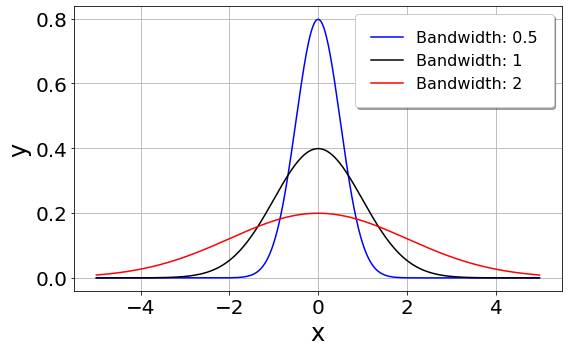

In [ ]:
# Bandwidth changes the kernel shape
def GaussianKernel(x,xi,h):
  return (1/(h*np.sqrt(2*np.pi)))*np.exp(-0.5*((x-xi)/h)**2)
xi = 0
bandwidth = 1

x_space = np.arange(-5, 5, 0.01)
y_space1 = np.zeros_like(x_space)
y_space2 = np.zeros_like(x_space)
y_space3 = np.zeros_like(x_space)
for idx, xii in enumerate(x_space):
  y_space1[idx] = GaussianKernel(xii, xi, 0.5)
  y_space2[idx] = GaussianKernel(xii, xi, 1)
  y_space3[idx] = GaussianKernel(xii, xi, 2)


# plot x, y
fig, ax = plt.subplots(figsize = (8,5))
line, = ax.plot(x_space, y_space1, '-', markersize=5, color='blue', label='Bandwidth: 0.5')
line, = ax.plot(x_space, y_space2, '-', markersize=5, color='black',  label='Bandwidth: 1')
line, = ax.plot(x_space, y_space3, '-', markersize=5, color='red',   label='Bandwidth: 2')
ax.legend(shadow=True, borderpad=1, fontsize=16, loc='best')
ax.axes.tick_params(labelsize=20)
ax.set_xlabel("x", fontsize=24)
ax.set_ylabel("y", fontsize=24)
ax.grid()
fig.tight_layout()

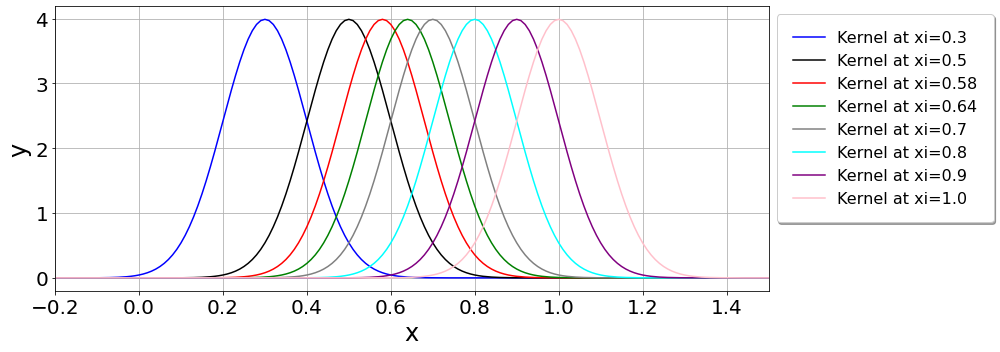

In [ ]:
# Kernels centered at different datapoints

bandwidth = 0.1

x_space = np.arange(-3, 5, 0.01)
y_space1 = np.zeros_like(x_space)
y_space2 = np.zeros_like(x_space)
y_space3 = np.zeros_like(x_space)
y_space4 = np.zeros_like(x_space)
y_space5 = np.zeros_like(x_space)
y_space6 = np.zeros_like(x_space)
y_space7 = np.zeros_like(x_space)
y_space8 = np.zeros_like(x_space)

for idx, xii in enumerate(x_space):
  y_space1[idx] = GaussianKernel(xii, x_data[0], bandwidth)
  y_space2[idx] = GaussianKernel(xii, x_data[1], bandwidth)
  y_space3[idx] = GaussianKernel(xii, x_data[2], bandwidth)
  y_space4[idx] = GaussianKernel(xii, x_data[3], bandwidth)
  y_space5[idx] = GaussianKernel(xii, x_data[4], bandwidth)
  y_space6[idx] = GaussianKernel(xii, x_data[5], bandwidth)
  y_space7[idx] = GaussianKernel(xii, x_data[6], bandwidth)
  y_space8[idx] = GaussianKernel(xii, x_data[7], bandwidth)


# plot x, y
fig, ax = plt.subplots(figsize = (14,5))
line, = ax.plot(x_space, y_space1, '-', markersize=5, color='blue',  label='Kernel at xi=0.3')
line, = ax.plot(x_space, y_space2, '-', markersize=5, color='black', label='Kernel at xi=0.5')
line, = ax.plot(x_space, y_space3, '-', markersize=5, color='red',   label='Kernel at xi=0.58')
line, = ax.plot(x_space, y_space4, '-', markersize=5, color='green',   label='Kernel at xi=0.64')
line, = ax.plot(x_space, y_space5, '-', markersize=5, color='gray',   label='Kernel at xi=0.7')
line, = ax.plot(x_space, y_space6, '-', markersize=5, color='cyan',   label='Kernel at xi=0.8')
line, = ax.plot(x_space, y_space7, '-', markersize=5, color='purple',   label='Kernel at xi=0.9')
line, = ax.plot(x_space, y_space8, '-', markersize=5, color='pink',   label='Kernel at xi=1.0')

ax.legend(shadow=True, borderpad=1, fontsize=16, loc='upper left', bbox_to_anchor=(1, 1))
ax.axes.tick_params(labelsize=20)
ax.set_xlabel("x", fontsize=24)
ax.set_ylabel("y", fontsize=24)
ax.set_xlim([-0.2,1.5])
ax.grid()
fig.tight_layout()

[0.000 0.015 0.080 0.185 0.298 0.298 0.110 0.015]
[0.009 16.302 130.723 319.779 596.406 860.316 384.838 61.465]
2369.8375127871127
2369.8375127871127


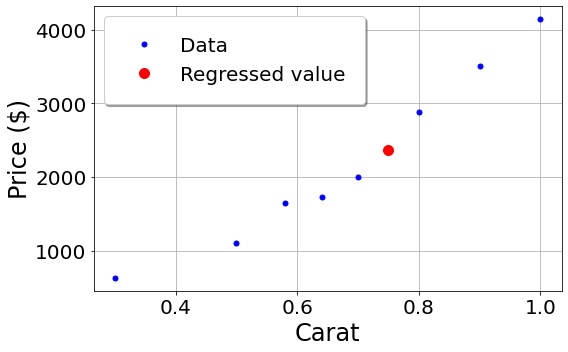

In [ ]:
# Kernel as weighting function

x = 0.75
bandwidth = 0.1

filter = np.zeros_like(x_data)
for i in range(8):
  filter[i] = GaussianKernel(x, x_data[i], bandwidth)
filter /= np.sum(filter)

print(filter)
print(filter * y_data)
print(np.dot(y_data, filter))

def KernelRegression(x, x_data, y_data, bandwidth):
  filter = np.zeros_like(x_data)
  for i in range(8):
    filter[i] = GaussianKernel(x, x_data[i], bandwidth)
  filter /= np.sum(filter)

  y_rg = np.dot(y_data, filter) # regressed y value
  return y_rg

y_rg = KernelRegression(x,x_data,y_data,bandwidth) 
print(y_rg)

# plot x, y
fig, ax = plt.subplots(figsize = (8,5))
line, = ax.plot(x_data, y_data, 'o', markersize=5, color='blue', label='Data')    
line, = ax.plot(x, y_rg, 'o', markersize=10, color='red', label='Regressed value')    
ax.legend(shadow=True, borderpad=1, fontsize=20, loc='best')
ax.axes.tick_params(labelsize=20)
ax.set_xlabel("Carat", fontsize=24)
ax.set_ylabel("Price ($)", fontsize=24)
ax.grid()
fig.tight_layout()

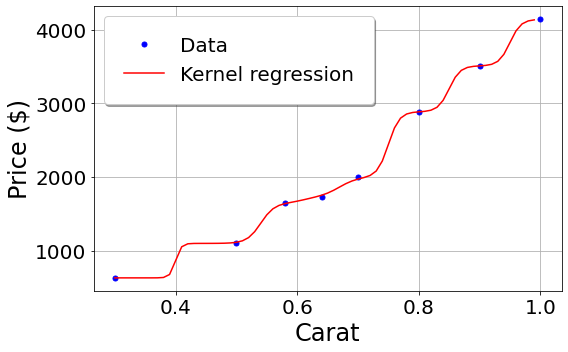

In [ ]:
# Kernel regression

bandwidth = 0.03
def KernelRegression(x, x_data, y_data, bandwidth):
  # Create kernel
  filter = np.zeros_like(x_data)
  for i in range(8):
    filter[i] = GaussianKernel(x, x_data[i], bandwidth)
  # Normalize kernel values
  filter /= np.sum(filter)

  # multiplication and accumulation
  y_rg = np.dot(y_data, filter) # regressed y value
  return y_rg

x_space = np.arange(0.3, 1.0, 0.01)
y_regressed = np.zeros_like(x_space)
for idx, x in enumerate(x_space):
  y_regressed[idx] = KernelRegression(x,x_data,y_data,bandwidth) 


# plot x, y
fig, ax = plt.subplots(figsize = (8,5))
line, = ax.plot(x_data, y_data, 'o', markersize=5, color='blue', label='Data')    
line, = ax.plot(x_space, y_regressed, '-',  color='red', label='Kernel regression')    
ax.legend(shadow=True, borderpad=1, fontsize=20, loc='best')
ax.axes.tick_params(labelsize=20)
ax.set_xlabel("Carat", fontsize=24)
ax.set_ylabel("Price ($)", fontsize=24)
ax.grid()
fig.tight_layout()